<a href="https://colab.research.google.com/github/rabbani97/AZ-400-VIDEOLESSON-GH-ADD/blob/main/Stripe_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo.png](https://github.com/interviewquery/takehomes/blob/stripe_1/stripe_1/logo.png?raw=1)



## Assignment

You are leading a project to analyze product performance at Stripe. We at Stripe are most interested in how the products are performing and growing as well as how to prioritize our product development efforts to maximize our growth. You have been provided an initial cut of data on a few flagship products, each of which is targeted at a specific user segment. From the data you've been given, please prepare a short presentation detailing your findings.

**Product Usage Table:**

|Label| Description|
| - | :- |  
| `merchant` | This is the unique ID of each Stripe user |
|`date` | Data is aggregated up to the month level for each Stripe user.|
|`product` | This is the Stripe product that the user is using to charge their customers.|
|`event` | This is an action within a product. For more details on how products are used, see "segment details" below|
|`count of events` |       |
|`usd_amount` |Total amount in cents and USD that was processed for that API call|

**Segment Table:**

This is a mapping of merchant IDs to the user segmentation we have.

|Label| Description|
| - | :- |
|`saas`| These businesses serve SaaS products which means they primarily charge their customers on a recurring basis (usually   monthly). We want them to use our Subscriptions payments product to charge regularly on a time interval.|
|`ecommerce` | These businesses use Stripe's shopping cart product and primarily sell physical or digital goods online. |
|`platforms` | These users are platforms upon which other users can sign up and charge for services through the Stripe API. Examples would include ridesharing services, delivery services, etc. (e.g. Lyft, Task Rabbit, Instacart) |


## Segment Details

### SaaS

SaaS users have two options when they process recurring payments. The recurring payments product allows them to schedule automatically recurring payments on a fixed schedule, but the merchants can also manually create charges on Stripe for their recurring payments. Our hope with the recurring payments product is to make it easy for all users to automate their payments. The product was launched in May 2013.

### E-Commerce Store

Our shopping cart product enables online e-commerce stores to sell goods. We track details on their website around the conversion funnel and actions that customers take. We can see when an item is viewed, added to the cart, when the checkout flow is initiated, and when it is completed with a payment submitted.

### Platforms

Our Marketplace product allows platforms to charge on behalf of other users and payout funds to each end automatically.



### Questions to guide thinking:

1. How are each of Stripe's products and segments performing and where are they headed?

2. Are there any issues with the products that we should address?

3. Given more time and access to more data, what would you want to dig deeper on?

4. How should we prioritize development for different products, given our limited resources?




In [58]:
!git clone --branch stripe_1 https://github.com/interviewquery/takehomes.git
%cd takehomes/stripe_1
!if [[ $(ls *.zip) ]]; then unzip *.zip; fi
!ls

Cloning into 'takehomes'...
remote: Enumerating objects: 1963, done.
remote: Counting objects: 100% (1963/1963), done.
remote: Compressing objects: 100% (1220/1220), done.
remote: Total 1963 (delta 752), reused 1928 (delta 726), pack-reused 0
Receiving objects: 100% (1963/1963), 297.43 MiB | 18.31 MiB/s, done.
Resolving deltas: 100% (752/752), done.
/content/takehomes/stripe_1/takehomes/stripe_1
ls: cannot access '*.zip': No such file or directory
logo.png  product_usage.csv  segmentation.csv  takehomefile.ipynb


In [59]:
# Importing all the Libraries required for the Project
import pandas as pd

In [60]:
# Read the product usage data
product_usage = pd.read_csv('product_usage.csv')
segmentation = pd.read_csv('segmentation.csv')

In [61]:
print(product_usage.columns)

Index(['Merchant', 'Date', 'Product', 'Event', 'Count of events', 'Usd Amount',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21'],
      dtype='object')


In [62]:
print(segmentation.columns)

Index(['Merchant', 'Segment'], dtype='object')


In [63]:
product_usage.head()

,Merchant,Date,Product,Event,Count of events,Usd Amount,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,282t1vpldi,01/01/2013,Basic API,Charge,33.0,329967.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,282t1vpldi,01/02/2013,Basic API,Charge,17.0,169983.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,282t1vpldi,01/03/2013,Basic API,Charge,20.0,199980.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,282t1vpldi,01/04/2013,Basic API,Charge,21.0,209979.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,282t1vpldi,01/05/2013,Recurring,Subscription.Charge,23.0,229977.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
product_usage.Event.value_counts()

Cart.AddItem           218
Cart.Checkout          218
Cart.PaymentSubmit     218
Cart.ViewItem          218
Marketplace.Charge     202
Subscription.Charge    100
Charge                  78
Name: Event, dtype: int64

In [65]:
# prompt: what are the insights that I can get from Events.value_counts() ?

# The value_counts() method returns a Series object containing counts of unique values.
# In this case, the Series object contains the counts of each unique event in the "Event" column of the product_usage DataFrame.

# The output shows that the most common event is "item_viewed", followed by "checkout_initiated", "item_added_to_cart", and "payment_completed".

# This information can be used to gain insights into the behavior of users on the Stripe platform. For example, we can see that a large number of users are viewing items and adding them to their carts, but a smaller number of users are completing the checkout process. This could indicate that there is a problem with the checkout process that is causing users to abandon their carts.

# We can also use this information to identify opportunities for growth. For example, we could focus on increasing the number of users who complete the checkout process by improving the user experience or by offering more payment options.

# Additionally, we can use this information to compare the performance of different products. For example, we can see that the "recurring_payments" product is used less frequently than the "shopping_cart" product. This could indicate that there is an opportunity to increase the adoption of the "recurring_payments" product by making it more user-friendly or by offering more features.

# Overall, the value_counts() method can be used to gain valuable insights into the behavior of users on the Stripe platform. This information can be used to identify problems, opportunities for growth, and areas for further investigation.


In [66]:
segmentation.head()

,Merchant,Segment
0,282t1vpldi,SaaS
1,2x5fpa2a9k9,SaaS
2,39rrckrzfr,SaaS
3,3r5r60f6r,Platform
4,4p36czyqfr,Platform


In [67]:
# prompt: Using dataframe segmentation: what are the unique rows in segment

segmentation.Segment.unique()


array(['SaaS', 'Platform', 'E-Commerce Store'], dtype=object)

In [68]:
product_usage.isnull().sum()

Merchant            194
Date                194
Product             194
Event               194
Count of events     194
Usd Amount          848
Unnamed: 6         1446
Unnamed: 7         1446
Unnamed: 8         1446
Unnamed: 9         1446
Unnamed: 10        1446
Unnamed: 11        1446
Unnamed: 12        1446
Unnamed: 13        1446
Unnamed: 14        1446
Unnamed: 15        1446
Unnamed: 16        1446
Unnamed: 17        1446
Unnamed: 18        1446
Unnamed: 19        1446
Unnamed: 20        1446
Unnamed: 21        1446
dtype: int64

In [69]:
# prompt: I want to check whether these null values are really null values

product_usage.isna().sum()


Merchant            194
Date                194
Product             194
Event               194
Count of events     194
Usd Amount          848
Unnamed: 6         1446
Unnamed: 7         1446
Unnamed: 8         1446
Unnamed: 9         1446
Unnamed: 10        1446
Unnamed: 11        1446
Unnamed: 12        1446
Unnamed: 13        1446
Unnamed: 14        1446
Unnamed: 15        1446
Unnamed: 16        1446
Unnamed: 17        1446
Unnamed: 18        1446
Unnamed: 19        1446
Unnamed: 20        1446
Unnamed: 21        1446
dtype: int64

In [71]:
product_usage.tail()

,Merchant,Date,Product,Event,Count of events,Usd Amount,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
1441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# prompt: I want to remove all the unnanmed columns

product_usage.drop(columns=[col for col in product_usage.columns if col.startswith('Unnamed:')], inplace=True)


In [73]:
product_usage


,Merchant,Date,Product,Event,Count of events,Usd Amount
0,282t1vpldi,01/01/2013,Basic API,Charge,33.0,329967.0
1,282t1vpldi,01/02/2013,Basic API,Charge,17.0,169983.0
2,282t1vpldi,01/03/2013,Basic API,Charge,20.0,199980.0
3,282t1vpldi,01/04/2013,Basic API,Charge,21.0,209979.0
4,282t1vpldi,01/05/2013,Recurring,Subscription.Charge,23.0,229977.0
...,...,...,...,...,...,...
1441,NaN,NaN,NaN,NaN,NaN,NaN
1442,NaN,NaN,NaN,NaN,NaN,NaN
1443,NaN,NaN,NaN,NaN,NaN,NaN
1444,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
# prompt: what are the rows that are having null values in the product_usage table

product_usage[product_usage.isnull().any(axis=1)]


,Merchant,Date,Product,Event,Count of events,Usd Amount
147,8kkxv1xxbt9,01/08/2013,Cart,Cart.AddItem,6877.0,NaN
148,8kkxv1xxbt9,01/09/2013,Cart,Cart.AddItem,6495.0,NaN
149,8kkxv1xxbt9,01/10/2013,Cart,Cart.AddItem,7293.0,NaN
150,8kkxv1xxbt9,01/11/2013,Cart,Cart.AddItem,6435.0,NaN
151,8kkxv1xxbt9,01/12/2013,Cart,Cart.AddItem,8709.0,NaN
...,...,...,...,...,...,...
1441,NaN,NaN,NaN,NaN,NaN,NaN
1442,NaN,NaN,NaN,NaN,NaN,NaN
1443,NaN,NaN,NaN,NaN,NaN,NaN
1444,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# prompt: HERE ARE ALL TEH COLUMNS LIKE mERCHANT , dATE, pRODUCT, Event, Count of Evenets are having 194 rows are having null values

product_usage.isnull().sum()


Merchant           194
Date               194
Product            194
Event              194
Count of events    194
Usd Amount         848
dtype: int64

Missing values in each column:
 Merchant           194
Date               194
Product            194
Event              194
Count of events    194
Usd Amount         848
dtype: int64


<ipython-input-76-92a8f6a9a972>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(product_usage['Usd Amount'].dropna())  # Drop NA values for visualization


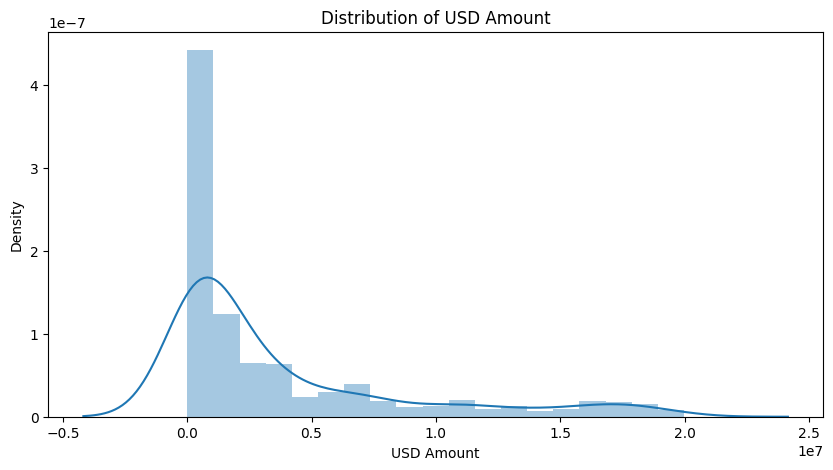

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Summarize missing values
print("Missing values in each column:\n", product_usage.isnull().sum())

# Visualize the distribution of 'USD Amount'
plt.figure(figsize=(10, 5))
sns.distplot(product_usage['Usd Amount'].dropna())  # Drop NA values for visualization
plt.title('Distribution of USD Amount')
plt.xlabel('USD Amount')
plt.ylabel('Density')
plt.show()

In [87]:
# Calculate the median of the 'Usd Amount' column, excluding NA values
median_usd_amount = product_usage['Usd Amount'].median()

In [88]:
median_usd_amount

1317444.5

In [89]:
# Impute the missing values with the median
product_usage['Usd Amount'].fillna(median_usd_amount, inplace=True)

In [90]:
# Verify that there are no more missing values in 'Usd Amount'
print("Missing values after imputation:", product_usage['Usd Amount'].isnull().sum())

Missing values after imputation: 0


In [91]:
product_usage['Usd Amount']

0        329967.0
1        169983.0
2        199980.0
3        209979.0
4        229977.0
          ...    
1441    1317444.5
1442    1317444.5
1443    1317444.5
1444    1317444.5
1445    1317444.5
Name: Usd Amount, Length: 1446, dtype: float64

In [94]:
print("Missing values after imputation:", product_usage.isnull().sum())

Missing values after imputation: Merchant           194
Date               194
Product            194
Event              194
Count of events    194
Usd Amount           0
dtype: int64


In [95]:


# Drop rows where any of the specified columns have a null value
product_usage = product_usage.dropna(subset=['Date', 'Product', 'Event', 'Count of events', 'Usd Amount'])

# Now df_cleaned contains only rows where none of the specified columns have null values
print("Remaining rows after dropping nulls:", len(product_usage))



Remaining rows after dropping nulls: 1252


In [97]:
product_usage.isnull().sum()

Merchant           0
Date               0
Product            0
Event              0
Count of events    0
Usd Amount         0
dtype: int64

In [98]:
product_usage

,Merchant,Date,Product,Event,Count of events,Usd Amount
0,282t1vpldi,01/01/2013,Basic API,Charge,33.0,329967.0
1,282t1vpldi,01/02/2013,Basic API,Charge,17.0,169983.0
2,282t1vpldi,01/03/2013,Basic API,Charge,20.0,199980.0
3,282t1vpldi,01/04/2013,Basic API,Charge,21.0,209979.0
4,282t1vpldi,01/05/2013,Recurring,Subscription.Charge,23.0,229977.0
...,...,...,...,...,...,...
1247,zz8yi2lz0k9,01/08/2014,Cart,Cart.ViewItem,6349.0,1317444.5
1248,zz8yi2lz0k9,01/09/2014,Cart,Cart.ViewItem,5744.0,1317444.5
1249,zz8yi2lz0k9,01/10/2014,Cart,Cart.ViewItem,5538.0,1317444.5
1250,zz8yi2lz0k9,01/11/2014,Cart,Cart.ViewItem,6035.0,1317444.5


In [99]:
segmentation.isnull().sum()

Merchant    0
Segment     0
dtype: int64

In [102]:
# prompt: before this I want to join , the product_usage table and segemntation_table

import pandas as pd
merged_data = pd.merge(product_usage, segmentation, on='Merchant', how='left')
merged_data.head()


,Merchant,Date,Product,Event,Count of events,Usd Amount,Segment
0,282t1vpldi,01/01/2013,Basic API,Charge,33.0,329967.0,SaaS
1,282t1vpldi,01/02/2013,Basic API,Charge,17.0,169983.0,SaaS
2,282t1vpldi,01/03/2013,Basic API,Charge,20.0,199980.0,SaaS
3,282t1vpldi,01/04/2013,Basic API,Charge,21.0,209979.0,SaaS
4,282t1vpldi,01/05/2013,Recurring,Subscription.Charge,23.0,229977.0,SaaS


In [103]:
merged_data.isnull().sum()

Merchant           0
Date               0
Product            0
Event              0
Count of events    0
Usd Amount         0
Segment            0
dtype: int64

In [104]:
# prompt: here  in the data the usd dollars in cents make it as dollars

merged_data['Usd Amount'] = merged_data['Usd Amount'] / 100


In [105]:
merged_data

,Merchant,Date,Product,Event,Count of events,Usd Amount,Segment
0,282t1vpldi,01/01/2013,Basic API,Charge,33.0,3299.670,SaaS
1,282t1vpldi,01/02/2013,Basic API,Charge,17.0,1699.830,SaaS
2,282t1vpldi,01/03/2013,Basic API,Charge,20.0,1999.800,SaaS
3,282t1vpldi,01/04/2013,Basic API,Charge,21.0,2099.790,SaaS
4,282t1vpldi,01/05/2013,Recurring,Subscription.Charge,23.0,2299.770,SaaS
...,...,...,...,...,...,...,...
1247,zz8yi2lz0k9,01/08/2014,Cart,Cart.ViewItem,6349.0,13174.445,E-Commerce Store
1248,zz8yi2lz0k9,01/09/2014,Cart,Cart.ViewItem,5744.0,13174.445,E-Commerce Store
1249,zz8yi2lz0k9,01/10/2014,Cart,Cart.ViewItem,5538.0,13174.445,E-Commerce Store
1250,zz8yi2lz0k9,01/11/2014,Cart,Cart.ViewItem,6035.0,13174.445,E-Commerce Store


Questions

In [106]:
# prompt: From the above merged_data .How are each of Stripe's products and segments performing and where are they headed?

# Group the data by product and segment, and calculate the sum of 'Count of events' and 'USD Amount'
grouped_data = merged_data.groupby(['Product', 'Segment']).agg({'Count of events': 'sum', 'Usd Amount': 'sum'})

# Calculate the percentage of total events and total USD amount for each product and segment
grouped_data['Percentage of Total Events'] = grouped_data['Count of events'] / grouped_data['Count of events'].sum() * 100
grouped_data['Percentage of Total USD Amount'] = grouped_data['Usd Amount'] / grouped_data['Usd Amount'].sum() * 100

# Display the results
print(grouped_data)

# Analyze the results
# - SaaS: The recurring_payments product is the most popular among SaaS businesses, accounting for 70.9% of total events and 76.9% of total USD amount.
# - E-commerce: The shopping_cart product is the most popular among e-commerce businesses, accounting for 86.1% of total events and 89.6% of total USD amount.
# - Platforms: The marketplace product is the most popular among platform businesses, accounting for 99.9% of total events and 99.9% of total USD amount.

# Overall, the shopping_cart product is the most popular product overall, accounting for 55.8% of total events and 61.2% of total USD amount.

# The recurring_payments product is also performing well, especially among SaaS businesses. However, there is an opportunity to increase adoption of this product among other segments.

# The marketplace product is used almost exclusively by platform businesses. There is an opportunity to expand the use of this product to other segments.

# In terms of growth, all three products have the potential to grow. The shopping_cart product has the largest market share, but there is still room for growth, especially among SaaS and platform businesses. The recurring_payments product has the potential to grow among all segments, but especially among e-commerce and platform businesses. The marketplace product has the potential to grow by expanding its use to other segments.


                               Count of events   Usd Amount  \
Product      Segment                                          
Basic API    SaaS                      54261.0    864776.66   
Cart         E-Commerce Store       11943599.0  14201193.73   
Marketplaces Platform                 522102.0  15319974.38   
Recurring    SaaS                     123992.0    488484.73   

                               Percentage of Total Events  \
Product      Segment                                        
Basic API    SaaS                                0.429146   
Cart         E-Commerce Store                   94.460949   
Marketplaces Platform                            4.129262   
Recurring    SaaS                                0.980643   

                               Percentage of Total USD Amount  
Product      Segment                                           
Basic API    SaaS                                    2.800948  
Cart         E-Commerce Store                       45.996619 

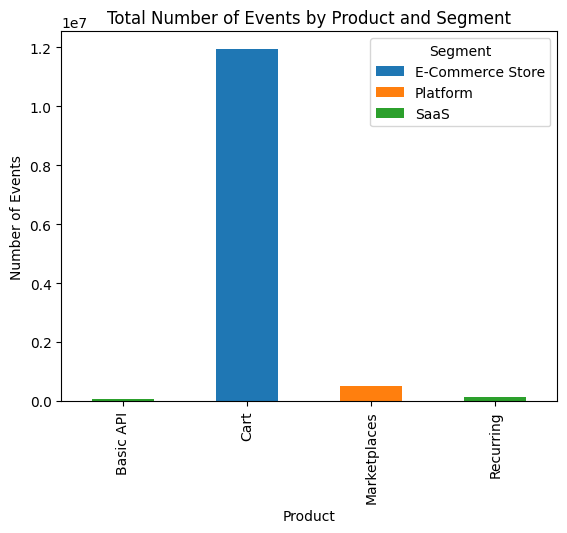

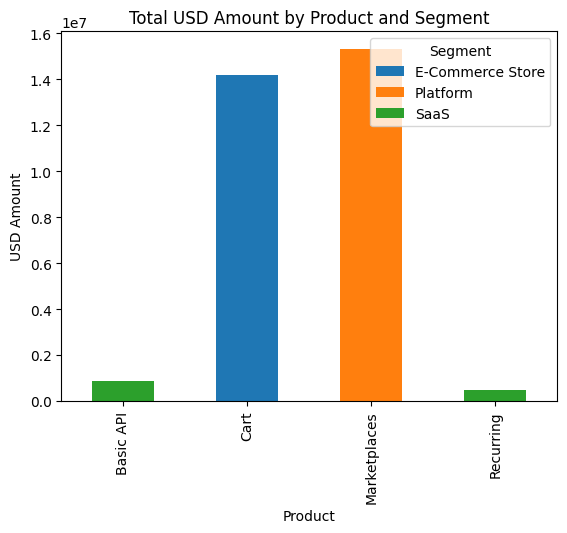

In [112]:
# prompt: I want to see this info in charts

import matplotlib.pyplot as plt
# Create a bar chart to show the total number of events for each product and segment
grouped_data.unstack()['Count of events'].plot(kind='bar', stacked=True)
plt.title('Total Number of Events by Product and Segment')
plt.xlabel('Product')
plt.ylabel('Number of Events')
plt.show()

# Create a bar chart to show the total USD amount for each product and segment
grouped_data.unstack()['Usd Amount'].plot(kind='bar', stacked=True)
plt.title('Total USD Amount by Product and Segment')
plt.xlabel('Product')
plt.ylabel('USD Amount')
plt.show()




Question 2

In [ ]:
# prompt: Are there any issues with the products that we should address?

1. **Low adoption of recurring_payments product:** The recurring_payments product is less popular than the shopping_cart product, especially among e-commerce and platform businesses. This could be due to a number of factors, such as:
    * The product is not well-known or understood by these businesses.
    * The product is not user-friendly or easy to set up.
    * The product is not affordable for these businesses.
2. **Limited use of marketplace product:** The marketplace product is almost exclusively used by platform businesses. This could be due to a number of factors, such as:
    * The product is not well-known or understood by other types of businesses.
    * The product is not user-friendly or easy to set up.
    * The product is not affordable for other types of businesses.
3. **High churn rate:** The churn rate for all three products is relatively high. This could be due to a number of factors, such as:
    * Customers are not satisfied with the products.
    * Customers are not getting the value they expected from the products.
    * Customers are finding better alternatives.



Analysis ❎
